In [141]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from smooth import smoothen


%matplotlib inline

In [142]:
filelist = ["calcium_data/140708B_140811a_result", 
            "calcium_data/140909C_141112a_result", 
            "calcium_data/141006C_141121a_result",
            "calcium_data/150109A_150302a_result", 
            "calcium_data/151122A_160202a_result", 
            "calcium_data/151122B_160207a_result", 
            "calcium_data/160209A_160430a_result", 
            "calcium_data/160209B_160428a_result"]

In [185]:
f = h5py.File(filelist[2]+'.hdf5', 'r')
data = f['data']
d = smoothen(filelist[2])

s = 48

In [186]:
m = np.mean(f['data'][:,s,:], axis=0)

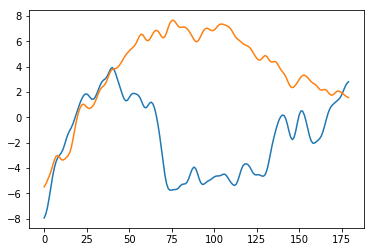

In [187]:
trials_mask_1 = f['meta'][:, 1] == 1
trials_mask_2 = f['meta'][:, 1] == 0

baseline = np.mean(data[:,:,:s], axis=2).reshape(data.shape[0], data[:,:,:].shape[1])

#plt.plot(m)
#plt.plot(np.mean(d[:,59,:], axis=0))
plt.plot(np.mean(d[trials_mask_1, s, :]-np.tile(baseline[trials_mask_1, s], (180, 1)).T, axis=0))
plt.plot(np.mean(d[trials_mask_2, s, :]-np.tile(baseline[trials_mask_2, s], (180, 1)).T, axis=0))

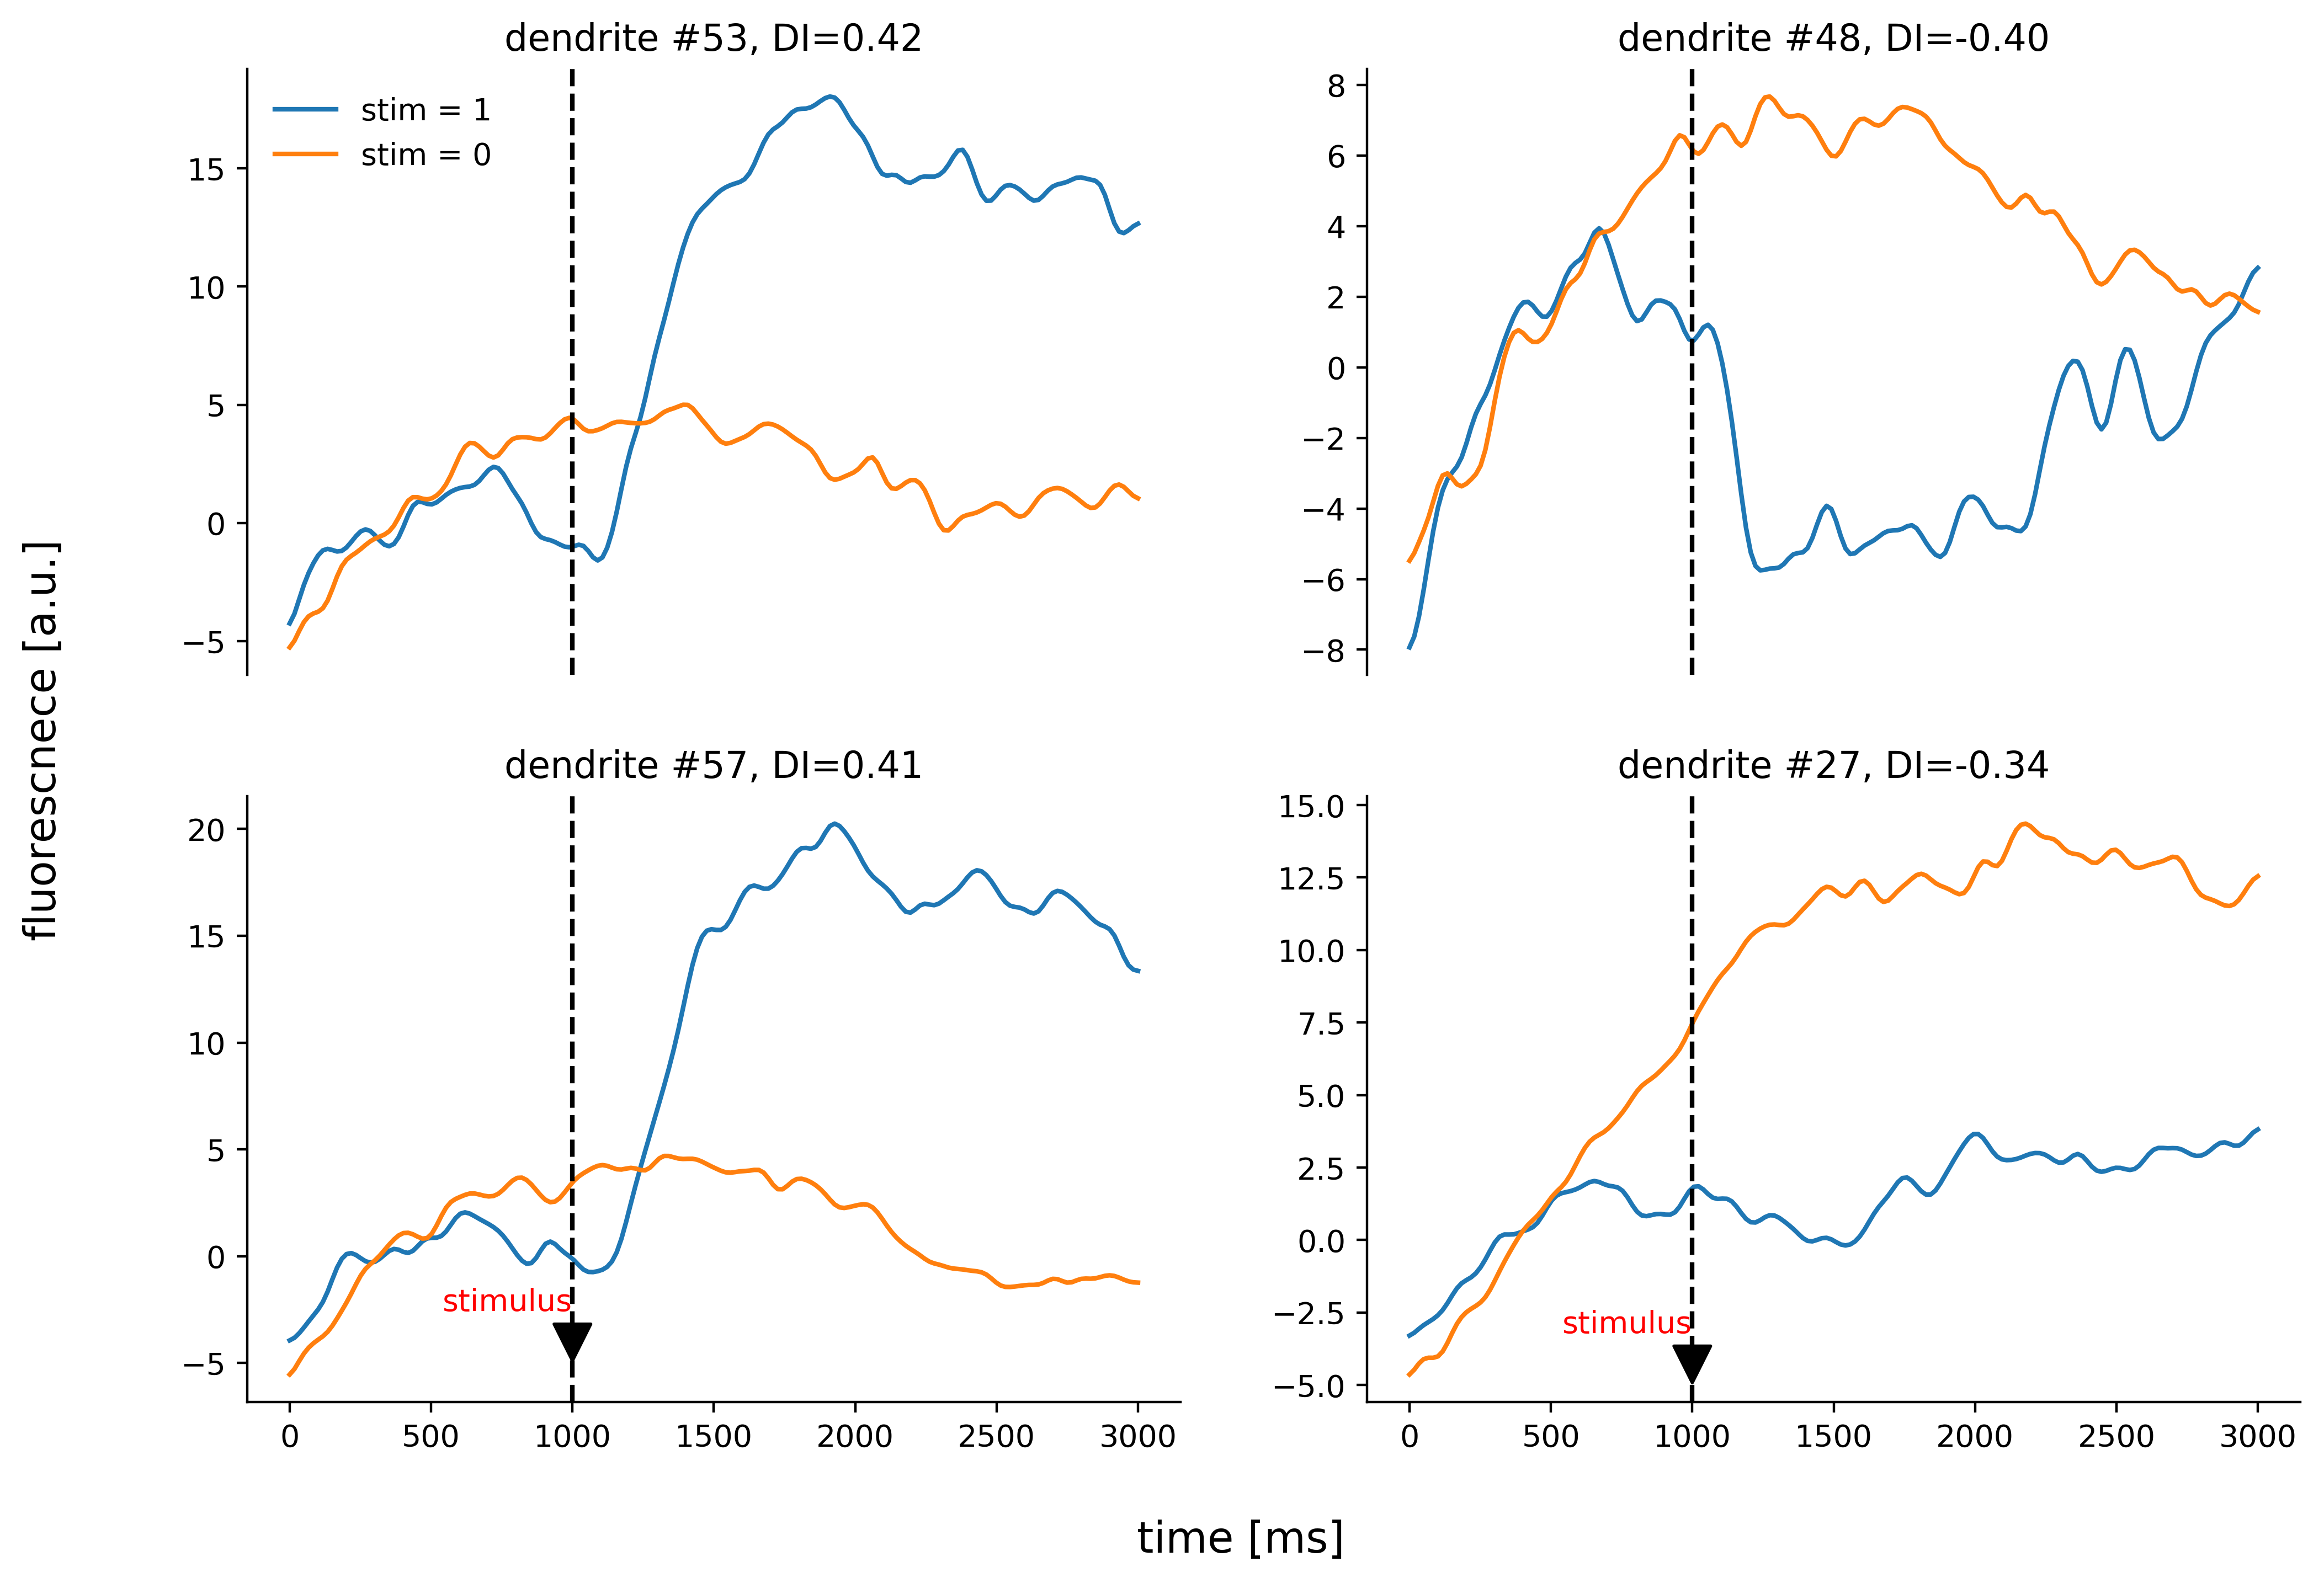

In [218]:
maxinds = [53, 57]
mininds = [48, 27]
inds = [53, 48, 57, 27]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, figsize=(12,8), dpi=400)
axarr = ax1, ax2, ax3, ax4
for k, ax in enumerate(axarr):
    s = inds[k]
    ax.plot(np.linspace(0,3000, 180), np.mean(d[trials_mask_1, s, :]-np.tile(baseline[trials_mask_1, s], (180, 1)).T, axis=0), label='stim = 1')
    ax.plot(np.linspace(0,3000, 180), np.mean(d[trials_mask_2, s, :]-np.tile(baseline[trials_mask_2, s], (180, 1)).T, axis=0), label='stim = 0')
    
    ax.axvline(1000, linestyle='--', color='black')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
ax1.legend(frameon=False)

ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax1.xaxis.set_ticks_position('none') 
ax2.xaxis.set_ticks_position('none')

ax3.annotate('stimulus',
            xy=(1000, -5), xycoords='data',
            xytext=(0, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom', color="r")

ax4.annotate('stimulus',
            xy=(1000, -5), xycoords='data',
            xytext=(0, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom', color="r")

ax1.set_title('dendrite #53, DI=0.42')
ax3.set_title('dendrite #57, DI=0.41')
ax2.set_title('dendrite #48, DI=-0.40')
ax4.set_title('dendrite #27, DI=-0.34')

fig.text(0.5, 0.04, 'time [ms]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'fluorescnece [a.u.]', va='center', rotation='vertical', fontsize=14)

fig.savefig('on_vs_off.png')

#plt.tight_layout()

In [190]:
for ax in axarr:
    print(ax)

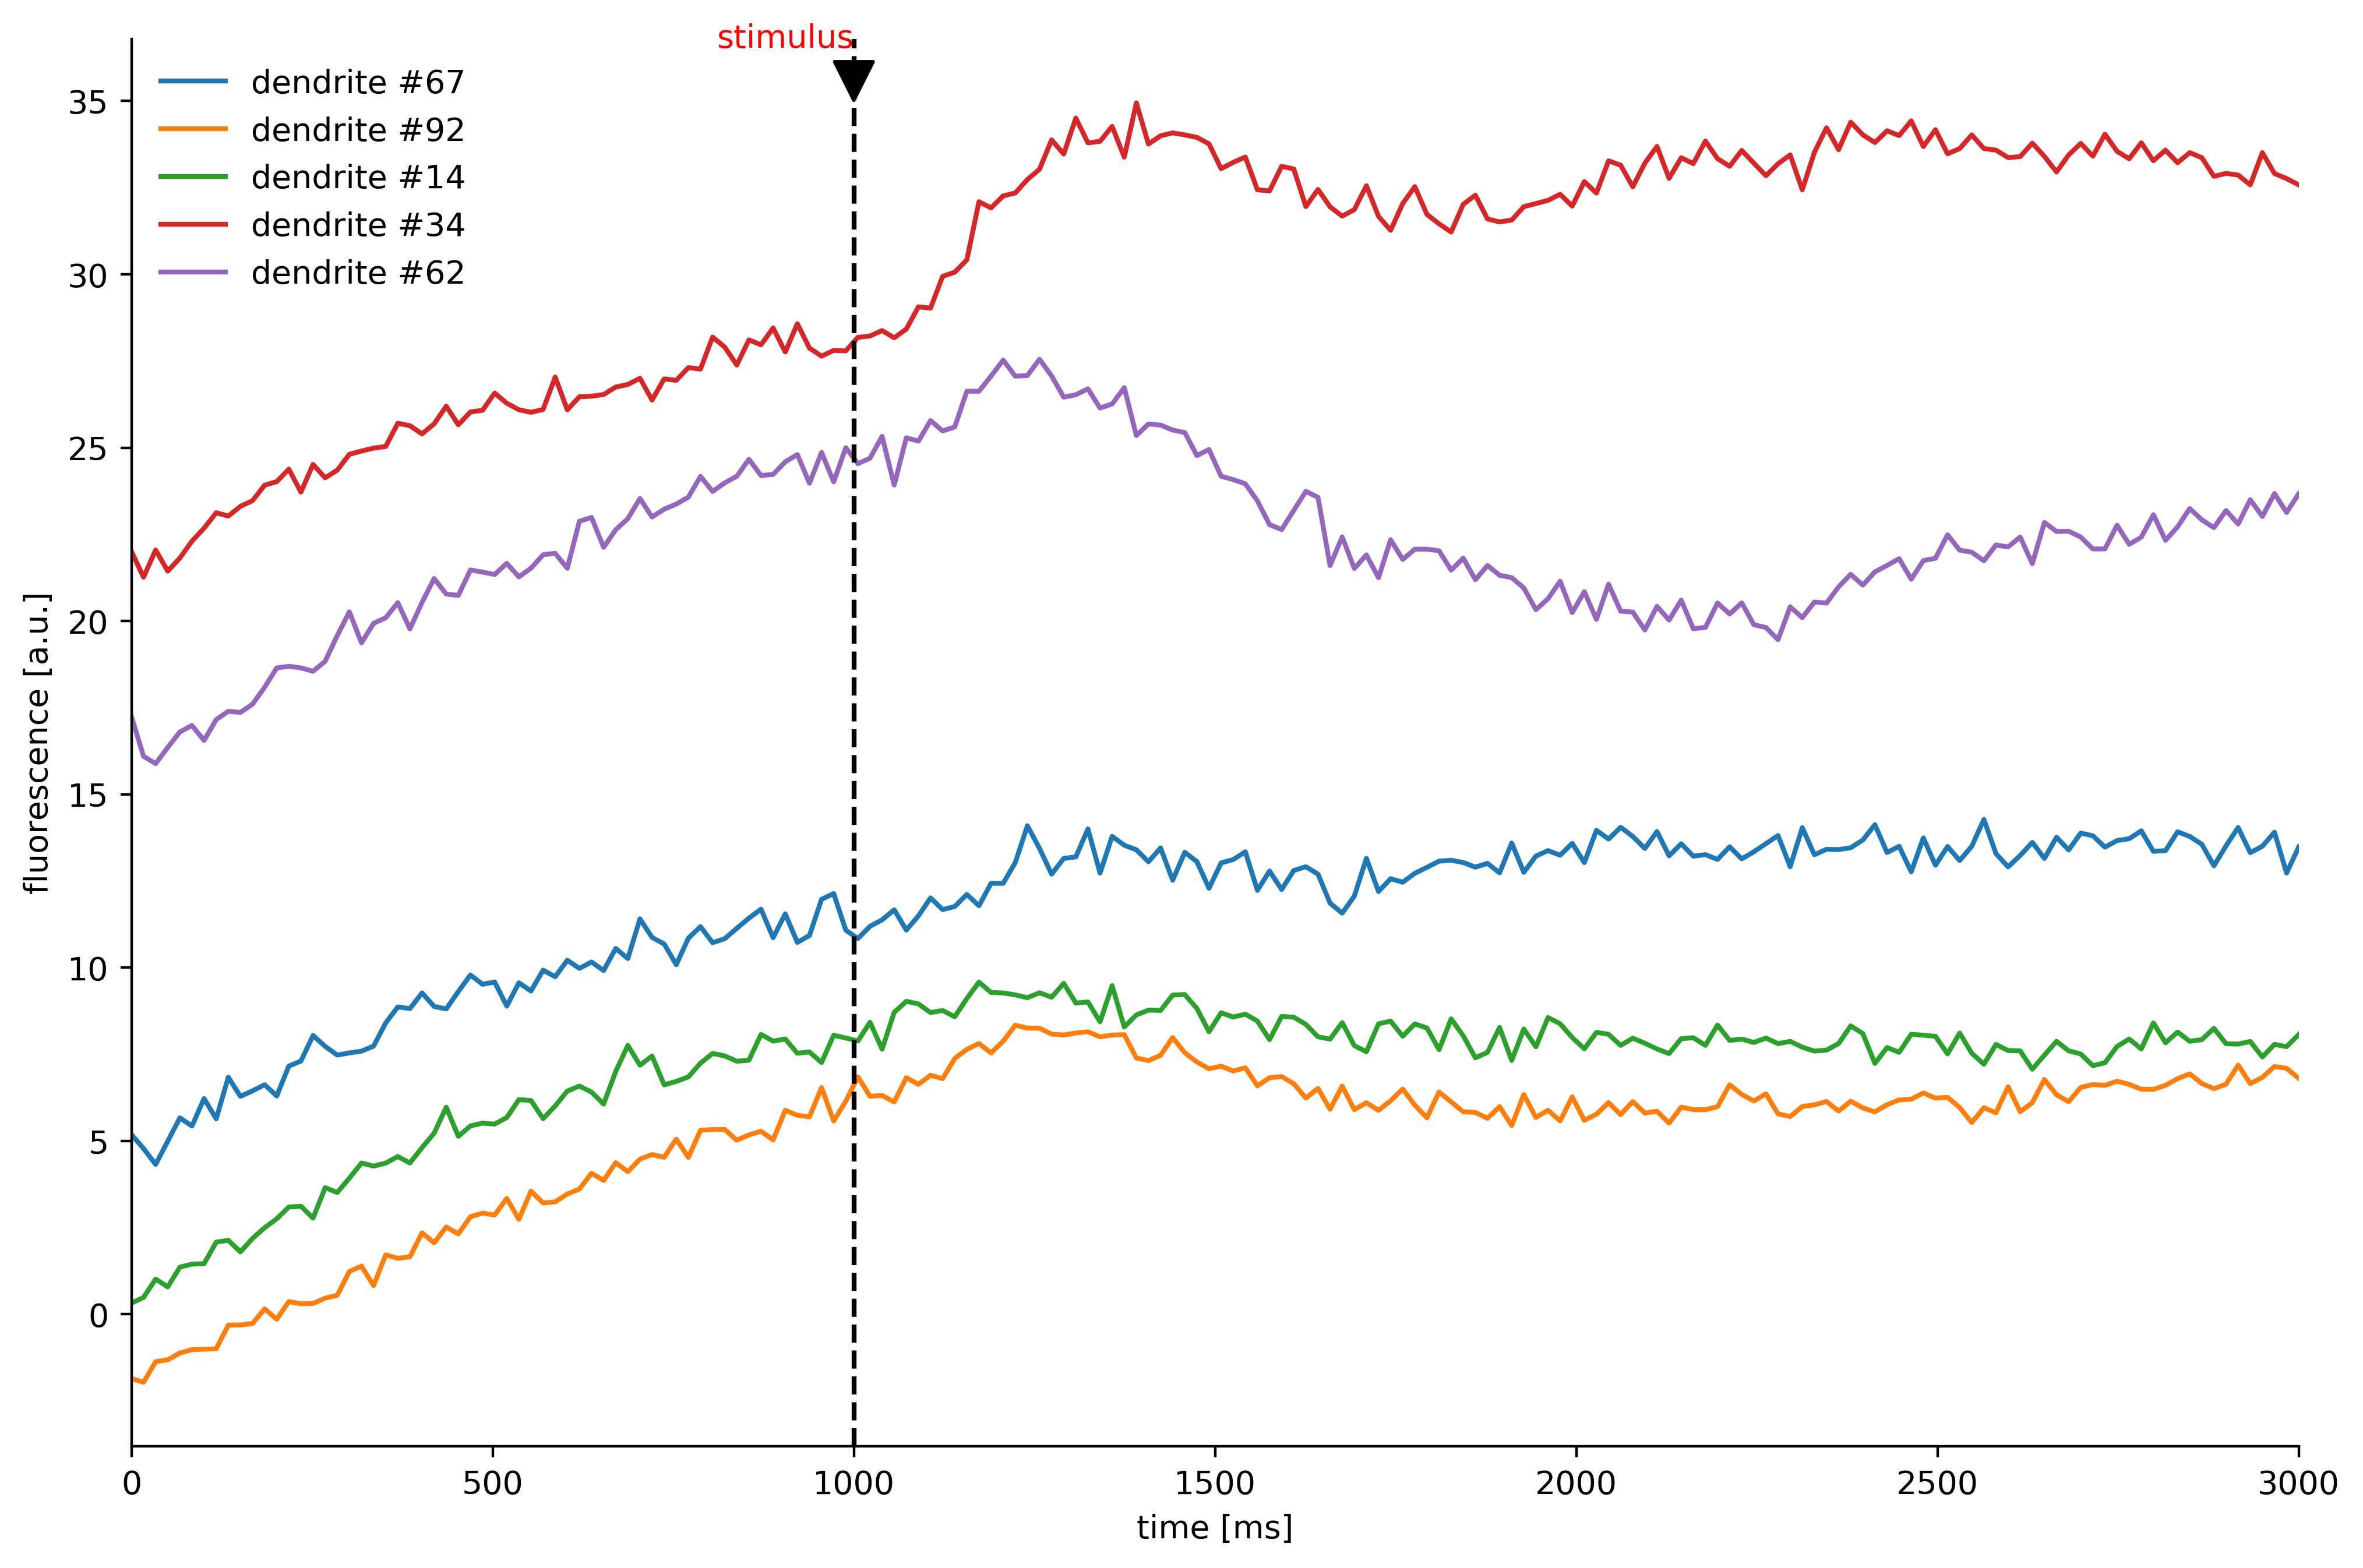

In [177]:
r = np.random.choice(f['data'][:].shape[1], size=len(axarr))
x = np.linspace(0,3000, 180)

g, ax = plt.subplots(1, 1, figsize=(12,8), dpi=400)

maxval = 0
for i, k in enumerate(r):
    ax.plot(x, np.mean(f['data'][:,k,:], axis=0), label='dendrite #{}'.format(k))
    m = np.max(np.mean(f['data'][:,k,:], axis=0))
    if m > maxval:
        maxval = m

ax.annotate('stimulus',
            xy=(1000, maxval), xycoords='data',
            xytext=(0, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom', color="r")

ax.axvline(1000, linestyle='--', color='black')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel('time [ms]')
ax.set_ylabel('fluorescence [a.u.]')

ax.legend(frameon=False)
#ax.grid()
plt.xlim(0,3000)

g.savefig('traces.png')

In [26]:
r

array([104,  53,  61,  28,  38])